# Gradient Descent with Momentum

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Contents:**

- [On a Zigzag Path to the Minimum](#1.-On-a-Zigzag-Path-to-the-Minimum)
- [Adding Momentum](#2.-Adding-Momentum)
- [Flat Valleys](#3.-Flat-Valleys)
- [Multiple local minima](#4.-Multiple-local-minima)
- [Gradient Descent with Momentum for Linear Regression](#5.-Gradient-Descent-with-Momentum-for-Linear-Regression)

## 1. On a Zigzag Path to the Minimum

Let's consider the quadratic function

$$
f(x,y) = 0.1x^2+12y^2
$$

In [2]:
# zig-zagging example
def f(x,y):
    return 0.1*x**2+12*y**2

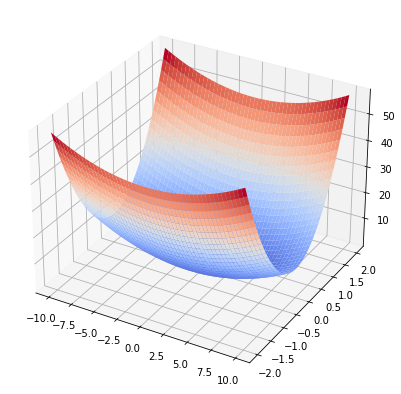

In [3]:
# plot z=f(x,y)
x = np.linspace(-10,10,1000)
y = np.linspace(-2,2,1000)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap='coolwarm') 

The minimum value of $f$ is zero. 
That minimum is reached at the point  $(0,0)$.

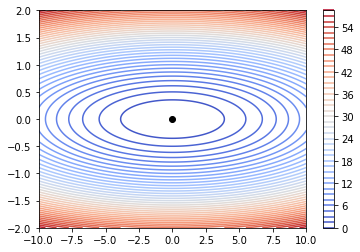

In [4]:
# contour plot
plt.contour(X,Y,Z,levels=50,cmap='coolwarm')
plt.colorbar()
plt.scatter(0,0,color='black') # minimum

Let's use **Gradient Descent** to find the minimum of $f(x,y)$.

The gradient of $f(x,y)$ is

$$
\nabla f(x,y) = 
\begin{bmatrix}
\frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y}
\end{bmatrix} =
\begin{bmatrix}
0.2x\\
24y^2
\end{bmatrix}
$$

In [5]:
# gradient of f(x,y)
def grad_f(x,y):
    return np.array([0.2*x,24*y])

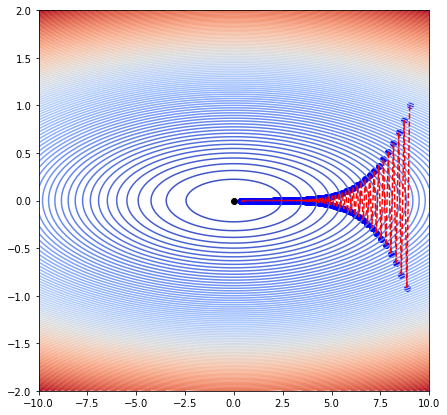

In [6]:
# plot gradient descent path to the minimum:

# contour plot of f(x,y)
plt.figure(figsize=(7,7))
plt.contour(X,Y,Z,cmap='coolwarm', levels=100)
plt.scatter(0,0,color='black') # minimum

#learning rate
learning_rate = 0.08

# starting point
x = np.array([9,1]) 
plt.scatter(x[0],x[1],color='blue')

# Gradient Descent
epochs = 200 #number of GD iterations
for epoch in range(epochs): 
    gradient = grad_f(x[0],x[1])
    new_x = x-learning_rate*gradient # gradient descent update
    plt.scatter(new_x[0],new_x[1],color='blue')
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r--')
    x = new_x

The plot shows the frustrating **zigzag pattern** of the steps toward $(0,0)$. 
We can improve this by **adding momentum** to the gradient descent method.

## 2. Adding Momentum

**Key idea**: the direction of the new step remembers the previous direction:

$$
x_i = x_{i-1}-s d_i, \quad \mbox{where} \quad d_i = \beta \, d_{i-1} + \nabla f(x_i)
$$

The parameter $\beta$ is called the **momentum coefficient**.
When $\beta=0$ , we recover gradient descent. 
But for $\beta=0.99$ (sometimes $0.999$, if things are really bad), this appears to be the boost we need.

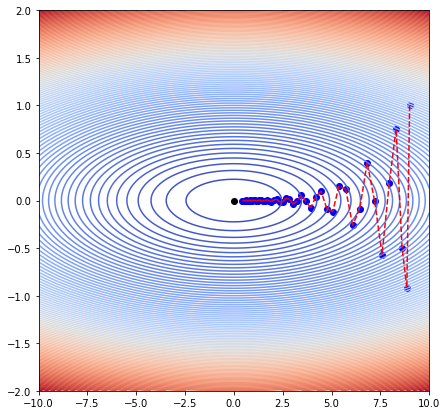

In [7]:
# plot gradient descent path to the minimum:

# contour plot of f(x,y)
plt.figure(figsize=(7,7))
plt.contour(X,Y,Z,cmap='coolwarm', levels=100)
plt.scatter(0,0,color='black') # minimum

#learning rate
learning_rate = 0.08

# starting point
x = np.array([9,1]) 
plt.scatter(x[0],x[1],color='blue')

# momentum parameter
beta = 0.7

# initialize directions
d_current = np.zeros(2)
d_previous = np.zeros(2)

# gradient descent with momentum
epochs = 50
for epoch in range(epochs): 
    
    d_current = grad_f(x[0],x[1]) + beta*d_previous
    new_x = x- learning_rate*d_current
    
    plt.scatter(new_x[0],new_x[1],color='blue')
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r--')
    
    x = new_x
    d_previous = d_current

## 3. Flat valleys

In [8]:
# slow crawling example 1
def f(x,y):
    return x**6+y**6

# gradient of f
def grad_f(x,y):
    return np.array([6*x**5,6*y**5])

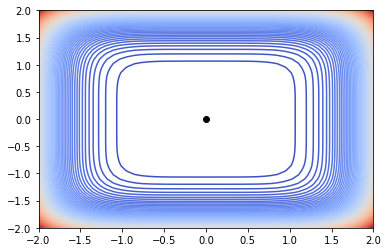

In [9]:
# contour plot
x = np.linspace(-2,2)
y = np.linspace(-2,2)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)

plt.contour(X,Y,Z,levels=100,cmap='coolwarm')
plt.scatter(0,0,color='black')

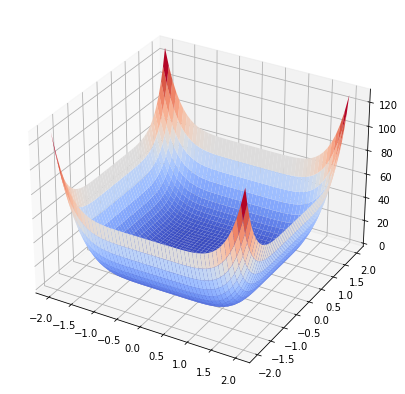

In [10]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

ax.plot_surface(X, Y, Z, cmap='coolwarm') 

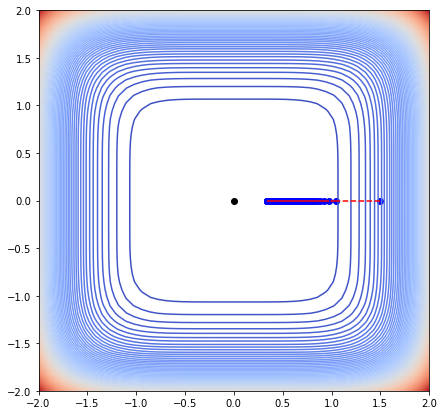

In [11]:
# plot gradient descent path to the minimum:

# contour plot of f(x,y)
plt.figure(figsize=(7,7))
plt.contour(X,Y,Z,cmap='coolwarm', levels=100)
plt.scatter(0,0,color='black') # minimum

#learning rate
learning_rate = 0.01

# starting point
x = np.array([1.5,0]) 
plt.scatter(x[0],x[1],color='blue')

# Gradient Descent
epochs = 300 #number of GD iterations
for epoch in range(epochs): 
    gradient = grad_f(x[0],x[1])
    new_x = x-learning_rate*gradient # gradient descent update
    plt.scatter(new_x[0],new_x[1],color='blue')
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r--')
    x = new_x

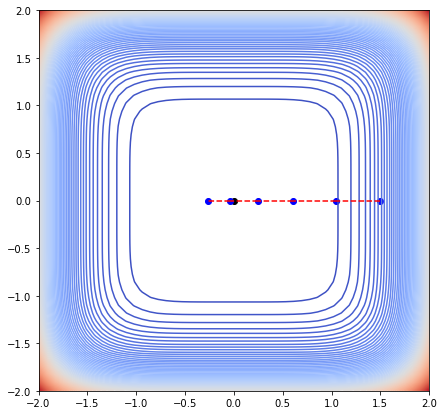

In [12]:
# plot gradient descent path to the minimum:

# contour plot of f(x,y)
plt.figure(figsize=(7,7))
plt.contour(X,Y,Z,cmap='coolwarm', levels=100)
plt.scatter(0,0,color='black') # minimum

#learning rate
learning_rate = 0.01

# starting point
x = np.array([1.5,0]) 
plt.scatter(x[0],x[1],color='blue')

# momentum parameter
beta = 0.8


# initialize directions
d_current = np.zeros(2)
d_previous = np.zeros(2)

# gradient descent with momentum
epochs = 5
for epoch in range(epochs): 
    
    d_current = grad_f(x[0],x[1]) + beta*d_previous
    new_x = x- learning_rate*d_current
    
    plt.scatter(new_x[0],new_x[1],color='blue')
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r--')
    
    
    x = new_x
    d_previous = d_current

In [13]:
# slow crawling example 2
def f(x,y):
    return np.tanh(4*x+4*y)+np.maximum(1,0.1*x**2)

def grad_f(x,y):
    dx = 4/np.cosh(4*x+4*y)**2 + (0 if np.abs(x)<np.sqrt(10) else x/5)
    dy = 4/np.cosh(4*x+4*y)**2
    return np.array([dx,dy])

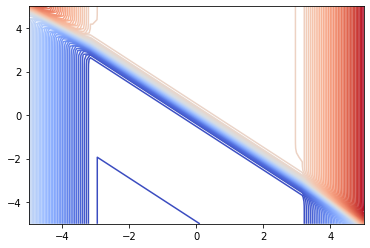

In [14]:
# contour plot
x = np.linspace(-5,5)
y = np.linspace(-5,5)
X,Y = np.meshgrid(x,y)
Z = f(X,Y)
plt.contour(X,Y,Z,levels=100,cmap='coolwarm')

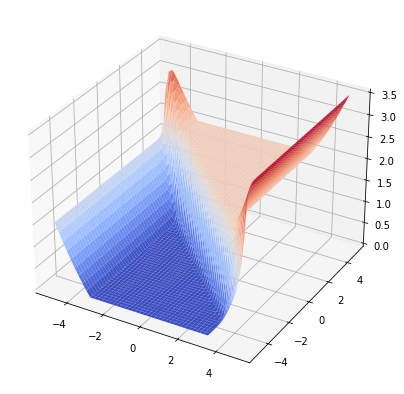

In [15]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm') 

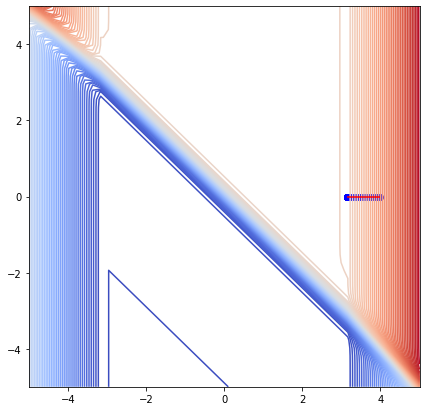

In [16]:
# plot gradient descent path to the minimum:

# contour plot of f(x,y)
plt.figure(figsize=(7,7))
plt.contour(X,Y,Z,cmap='coolwarm', levels=100)
plt.scatter(0,0,color='black') # minimum

#learning rate
learning_rate = .1

# starting point
x = np.array([4,0]) 
plt.scatter(x[0],x[1],color='blue')

# Gradient Descent
epochs = 200 #number of GD iterations
for epoch in range(epochs): 
    gradient = grad_f(x[0],x[1])
    new_x = x-learning_rate*gradient # gradient descent update
    plt.scatter(new_x[0],new_x[1],color='blue')
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r--')
    x = new_x

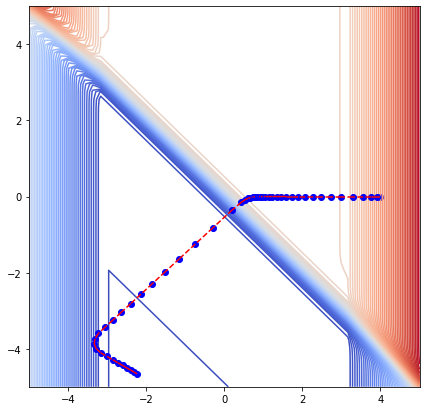

In [17]:
# plot gradient descent path to the minimum:

# contour plot of f(x,y)
plt.figure(figsize=(7,7))
plt.contour(X,Y,Z,cmap='coolwarm', levels=100)


# learning rate
learning_rate = .1

# momentum parameter
beta = 0.9

# starting point
x = np.array([4,0]) 
plt.scatter(x[0],x[1],color='blue')

# initialize directions
d_current = np.zeros(2)
d_previous = np.zeros(2)

# gradient descent with momentum
epochs = 50
for epoch in range(epochs): 
    
    d_current = grad_f(x[0],x[1]) + beta*d_previous
    new_x = x- learning_rate*d_current
    
    plt.plot(new_x[0],new_x[1],'bo')
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r--')
    
    x = new_x
    d_previous = d_current

## 4. Multiple local minima

In [44]:
def f(x,y):
    r = np.sqrt(x**2+y**2)
    return (r**5-3*r**4-r**3+10*r**2)*np.exp(-r)

In [19]:
def grad_f(x,y):
    r = np.sqrt(x**2+y**2)
    factor = -np.exp(-r)*(r**5-3*r**4-r**3+10*r**2) + np.exp(-r)*(5*r**4-12*r**3-3*r**2+20*r)
    dx = (x/r)*factor
    dy = (y/r)*factor
    return np.array([dx,dy])

In [40]:
x = np.linspace(-3,3,1000)
y = np.linspace(-3,3,1000)
X,Y = np.meshgrid(x,y)

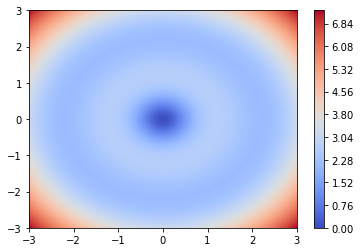

In [41]:
# contour plots
Z = f(X,Y)
plt.contourf(X,Y,Z,levels=200,cmap='coolwarm')
plt.colorbar()

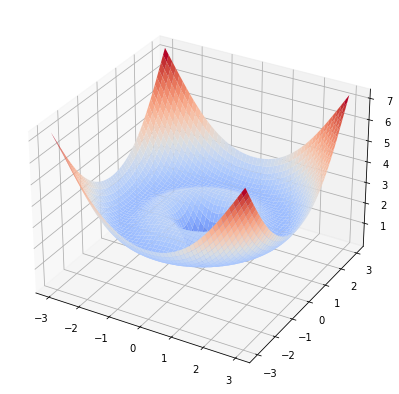

In [22]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm') 
#ax.set_zlim(0,10)

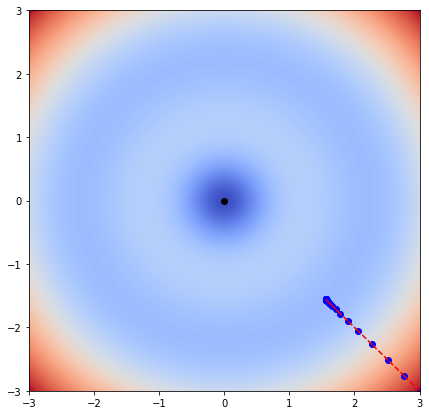

In [23]:
# plot gradient descent path to the minimum:

# contour plot of f(x,y)
plt.figure(figsize=(7,7))
plt.contourf(X,Y,Z,cmap='coolwarm', levels=200)
plt.scatter(0,0,color='black') # minimum

#learning rate
learning_rate = .1

# starting point
x = np.array([3,-3]) 
plt.scatter(x[0],x[1],color='blue')

# Gradient Descent
epochs = 100 #number of GD iterations
for epoch in range(epochs): 
    gradient = grad_f(x[0],x[1])
    new_x = x-learning_rate*gradient # gradient descent update
    plt.scatter(new_x[0],new_x[1],color='blue')
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r--')
    x = new_x

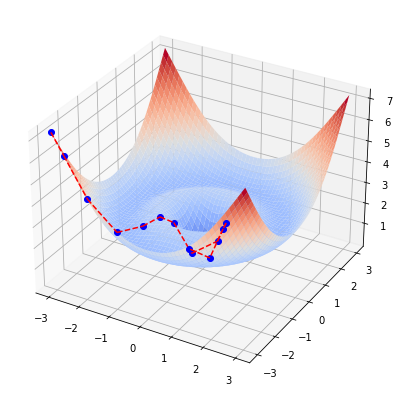

In [113]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm') 

# learning rate
learning_rate = .1

# momentum parameter
beta = 0.8

# starting point
x = np.array([-3,-3]) 
ax.plot(x[0],x[1],f(x[0],x[1]),'bo')

# initialize directions
d_current = np.zeros(2)
d_previous = np.zeros(2)

# gradient descent with momentum
epochs = 12
for epoch in range(epochs): 
    
    d_current = grad_f(x[0],x[1]) + beta*d_previous
    new_x = x- learning_rate*d_current
    
    ax.plot(new_x[0],new_x[1],f(new_x[0],new_x[1]),'bo',zorder=10)
    ax.plot([x[0],new_x[0]],[x[1],new_x[1]],[f(x[0],x[1]),f(new_x[0],new_x[1])],'r--',zorder=10)
    
    x = new_x
    d_previous = d_current
    


In [55]:
new_x[0],new_x[1],f(new_x[0],new_x[1])

(2.5162393404697805, 2.5162393404697805, 4.8738548389968575)

In [47]:
f(x[0],x[1])

7.274580003786966

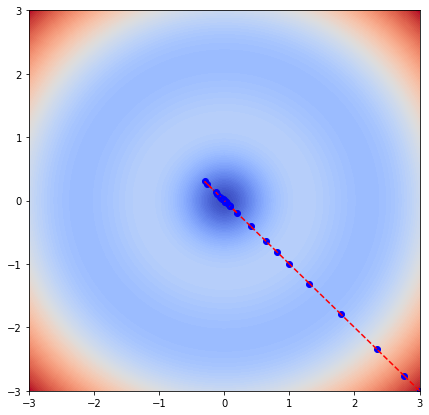

In [24]:
# contour plot of f(x,y)
plt.figure(figsize=(7,7))
plt.contourf(X,Y,Z,cmap='coolwarm', levels=100)


# learning rate
learning_rate = .1

# momentum parameter
beta = 0.75

# starting point
x = np.array([3,-3]) 
plt.scatter(x[0],x[1],color='blue')

# initialize directions
d_current = np.zeros(2)
d_previous = np.zeros(2)

# gradient descent with momentum
epochs = 30
for epoch in range(epochs): 
    
    d_current = grad_f(x[0],x[1]) + beta*d_previous
    new_x = x- learning_rate*d_current
    
    plt.plot(new_x[0],new_x[1],'bo')
    plt.plot([x[0],new_x[0]],[x[1],new_x[1]],'r--')
    
    x = new_x
    d_previous = d_current

## 5. Gradient Descent with Momentum for Linear Regression

In [25]:
def linregression_GD(X,y,learning_rate, momentum=0, n_epochs = 100, test_data = None):
    '''
    linear regression with Gradient Descent
    
    INPUT: 
    - the feature matrix X
    - the target vector y
    - learning rate
    - epochs: number of Gradient Descent iterations (default 100)
    - test_data (optional): data (X_test,y_test) for monitoring overfitting
    - momentum: momentum coefficient (default 0)
    
    OUTPUT:
    - the vector theta
    - mean squared error at each iteration
    '''
    m,n = X.shape # size of data set, number of features
    theta = np.random.randn(n) # random initialization
    
    # initialize mse vector 
    mse = np.zeros(n_epochs)

    # initialize mse_test vector (if test_data is not None)
    if test_data: 
        X_test,y_test = test_data
        mse_test = np.zeros(n_epochs)
        
    # initialize directions
    d_current = np.zeros(n)
    d_previous = np.zeros(n)
    
    # gradient descent iterations
    for epoch in range(n_epochs):
        gradient = 2*X.T.dot(X.dot(theta)-y) # gradient 
        d_current = gradient + momentum*d_previous  # new direction
        theta = theta - learning_rate*d_current # update the vector theta
        d_previous = d_current # update direction

        # compute mean squared error 
        mse[epoch] = np.mean((y-X.dot(theta))**2)
        # compute test mean squared error
        if test_data:
            mse_test[epoch] = np.mean((y_test-X_test.dot(theta))**2)
            
            
    results = {}
    results['theta'] = theta
    results['mse'] = mse
    if test_data:
        results['mse_test'] = mse_test
    return results

In [26]:
def build_poly_features(X,degree):
    from itertools import combinations_with_replacement as comb_w_r
    from itertools import chain
    
    # number of datapoints (rows), number of features (columns)
    try:
        m,n = X.shape # this won't work if X is a vector (n=1 features)
    except: 
        m = len(X)
        n = 1
        X = X.reshape(m,1) #  
    
    # number of polynomial features
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))
    n_poly = sum(1 for combination in combinations) 
    
    # polynomial features matrix
    X_poly = np.ones((m,n_poly))
    combinations = chain.from_iterable(comb_w_r(range(n),i) for i in range(degree+1))\
    
    
    for column_index, combination in enumerate(combinations):
        X_poly[:,column_index] = np.prod(X[:,combination],axis=1)
        
    return X_poly

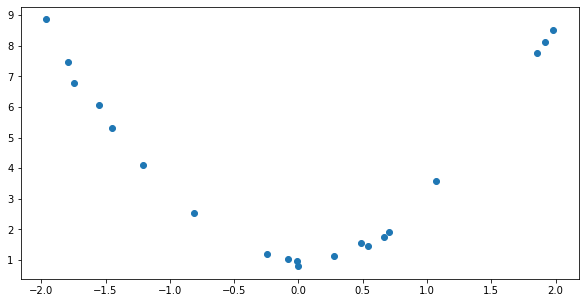

In [27]:
# generate and plot a toy dataset
m = 20
x = -2 + 4*np.random.rand(m)
y = 2*x**2+1+0.25*np.random.randn(m)
plt.figure(figsize=(10,5))
plt.plot(x,y,'o')

In [28]:
X = build_poly_features(x,degree=2)

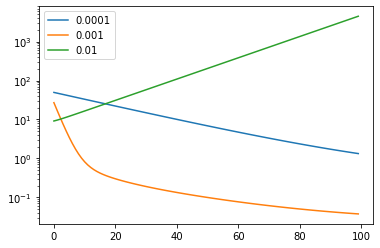

In [29]:
# try different learning rates
learning_rates=[0.0001,0.001,0.01]
for s in learning_rates:
    results = linregression_GD(X,y,learning_rate=s,n_epochs=100)
    mse = results['mse']
    plt.semilogy(mse,label=s)
    plt.legend()

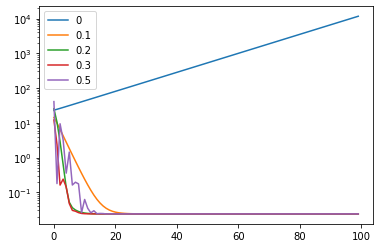

In [30]:
# try different momentum coefficients
momentum_coeffs=[0,0.1,0.2,0.3,0.5]
for m in momentum_coeffs:
    results = linregression_GD(X,y,learning_rate=0.01,momentum=m,n_epochs=100)
    mse = results['mse']
    plt.semilogy(mse,label=m)
    plt.legend()

In [31]:
s = 0.01
m = 0.3
results = linregression_GD(X,y,learning_rate=0.01,momentum=m,n_epochs=10)
theta = results['theta']

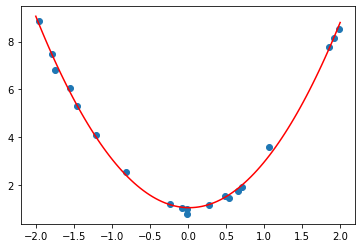

In [32]:
x_plot = np.linspace(-2,2,100)
X_plot = build_poly_features(x_plot,degree=2)
y_plot = X_plot.dot(theta)
plt.plot(x_plot,y_plot,color='red')
plt.scatter(x,y)